In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

In [2]:
data = pd.read_csv("/home/jishnu/Desktop/ Data_Sets/null-handeled_outlier-removed_synthetic.csv")

In [3]:
df1 = data.copy()

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  2600 non-null   object 
 1   Price     2600 non-null   float64
 2   Rating    2600 non-null   float64
 3   Stock     2600 non-null   object 
 4   Discount  2600 non-null   float64
dtypes: float64(3), object(2)
memory usage: 101.7+ KB


In [5]:
c1 = df1.select_dtypes("float")

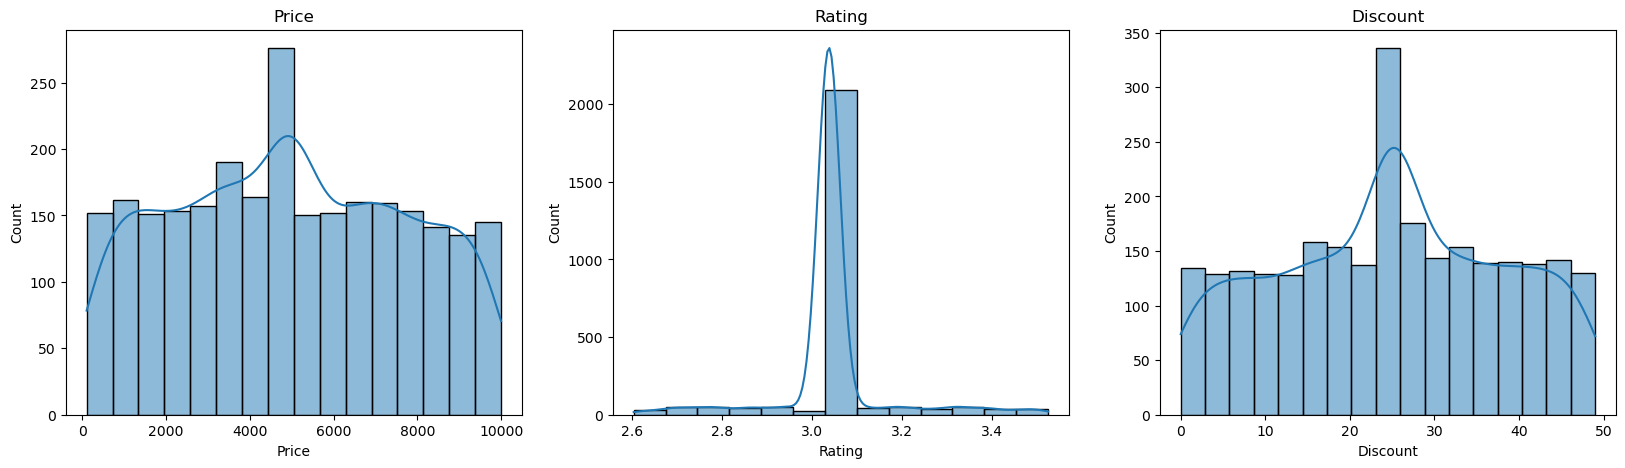

In [7]:
fig,axs = plt.subplots(1,3 , figsize = (20,5))

for i in range(3):
    sns.histplot(data = df1, x = c1.columns[i], ax = axs[i], kde = True)
    axs[i].set_title(c1.columns[i])
plt.show()

### one hot encoding

In [13]:
c2 = df1.select_dtypes("object")

df1 = pd.get_dummies(df1,columns = c2.columns,dtype = int, drop_first = True)
df1

,Price,Rating,Discount,Category_B,Category_C,Category_D,Stock_Out of Stock
0,4004.0,3.038293,0.0,0,1,0,0
1,1817.0,3.038293,23.0,0,1,0,1
2,3522.0,3.038293,25.0,0,1,0,0
3,2777.0,2.678384,6.0,0,0,0,0
4,1151.0,2.947838,25.0,0,0,0,0
...,...,...,...,...,...,...,...
2595,5788.0,3.038293,11.0,0,1,0,0
2596,4996.5,3.038293,46.0,0,1,0,0
2597,4996.5,3.038293,21.0,0,1,0,1
2598,6236.0,3.038293,4.0,1,0,0,1


In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Price               2600 non-null   float64
 1   Rating              2600 non-null   float64
 2   Discount            2600 non-null   float64
 3   Category_B          2600 non-null   int64  
 4   Category_C          2600 non-null   int64  
 5   Category_D          2600 non-null   int64  
 6   Stock_Out of Stock  2600 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 142.3 KB


In [15]:
c2 = df1.select_dtypes("float").columns

mm = MinMaxScaler()

df1[c2] = mm.fit_transform(df1[c2])

In [16]:
df1.describe()

,Price,Rating,Discount,Category_B,Category_C,Category_D,Stock_Out of Stock
count,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000
mean,0.490744,0.476873,0.505173,0.085385,0.730000,0.089231,0.342692
std,0.278071,0.130279,0.274358,0.279507,0.444045,0.285131,0.474701
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.263923,0.471282,0.285714,0.000000,0.000000,0.000000,0.000000
50%,0.494593,0.471282,0.510204,0.000000,1.000000,0.000000,0.000000
75%,0.721447,0.471282,0.714286,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### label Encoding

In [17]:
df2 = data.copy()

In [18]:
c3 = df2.select_dtypes("object")

c3.nunique()

Category    4
Stock       2
dtype: int64

In [19]:
le = LabelEncoder()